In [22]:
#Import dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text, inspect
import json
from ydata_profiling import ProfileReport

In [2]:
# Read in the csv
filepath = "data/Map_data.csv"
df = pd.read_csv(filepath)
df.head()

Air Date           Airdate              City   Country  Day  \
0   1/8/2002   January 8, 2002             Tokyo     Japan    8   
1  1/12/2002  January 12, 2002             Atami     Japan   12   
2  1/15/2002  January 15, 2002  Ho Chi Minh City   Vietnam   15   
3  1/15/2002  January 15, 2002      Mekong River   Vietnam   15   
4  1/22/2002  January 22, 2002        Phnom Penh  Cambodia   22   

                                         Description  Episode   Latitude  \
0  Join Tony in Tokyo as he learns about the Japa...        1  35.689487   
1  Rural Japan: Tony decides to look for a more r...        2  35.096276   
2  Travel with Tony Bourdain to Ho Chi Minh City ...        3  10.823099   
3  On the river, Tony drinks a lot of Mekong moon...        4  15.933589   
4  With a friend along for the ride, Tony travels...        5  11.556374   

    Longitude  Month1    Month  Number of Records  Order Region  Season  \
0  139.691706       1  January                  1      1   Asia       1   
1  139.071705       1  January                  1      2   Asia       1   
2  106.629664       1  January                  1      3   Asia       1   
3  103.449284       1  January                  1      4   Asia       1   
4  104.928210       1  January                  1      5   Asia       1   

            Show                                             Source State  \
0  A Cook's Tour  https://www.cookingchanneltv.com/shows/a-cooks...   NaN   
1  A Cook's Tour  https://www.cookingchanneltv.com/shows/a-cooks...   NaN   
2  A Cook's Tour  https://www.cookingchanneltv.com/shows/a-cooks...   NaN   
3  A Cook's Tour  https://www.cookingchanneltv.com/shows/a-cooks...   NaN   
4  A Cook's Tour  https://www.cookingchanneltv.com/shows/a-cooks...   NaN   

                                     Title  Year  
0                         A Taste of Tokyo  2002  
1                      Dining with Geishas  2002  
2  Cobra Heart - Foods That Make You Manly  2002  
3                     Eating on the Mekong  2002  
4                          Wild Delicacies  2002

In [3]:
# Take a look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air Date           495 non-null    object 
 1   Airdate            495 non-null    object 
 2   City               495 non-null    object 
 3   Country            495 non-null    object 
 4   Day                495 non-null    int64  
 5   Description        495 non-null    object 
 6   Episode            495 non-null    int64  
 7   Latitude           495 non-null    float64
 8   Longitude          495 non-null    float64
 9   Month1             495 non-null    int64  
 10  Month              495 non-null    object 
 11  Number of Records  495 non-null    int64  
 12  Order              495 non-null    int64  
 13  Region             495 non-null    object 
 14  Season             495 non-null    int64  
 15  Show               495 non-null    object 
 16  Source             495 non

In [4]:
# Delete unnecessary columns
df = df.drop(columns=['Airdate', 'Description', 'Source', 'Number of Records'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Air Date   495 non-null    object 
 1   City       495 non-null    object 
 2   Country    495 non-null    object 
 3   Day        495 non-null    int64  
 4   Episode    495 non-null    int64  
 5   Latitude   495 non-null    float64
 6   Longitude  495 non-null    float64
 7   Month1     495 non-null    int64  
 8   Month      495 non-null    object 
 9   Order      495 non-null    int64  
 10  Region     495 non-null    object 
 11  Season     495 non-null    int64  
 12  Show       495 non-null    object 
 13  State      140 non-null    object 
 14  Title      495 non-null    object 
 15  Year       495 non-null    int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 62.0+ KB


In [5]:
# Convert Air Date column to datetime format
df['Air Date'] = pd.to_datetime(df['Air Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Air Date   495 non-null    datetime64[ns]
 1   City       495 non-null    object        
 2   Country    495 non-null    object        
 3   Day        495 non-null    int64         
 4   Episode    495 non-null    int64         
 5   Latitude   495 non-null    float64       
 6   Longitude  495 non-null    float64       
 7   Month1     495 non-null    int64         
 8   Month      495 non-null    object        
 9   Order      495 non-null    int64         
 10  Region     495 non-null    object        
 11  Season     495 non-null    int64         
 12  Show       495 non-null    object        
 13  State      140 non-null    object        
 14  Title      495 non-null    object        
 15  Year       495 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(6), 

In [6]:
# Rename columns with spaces
df = df.rename(columns={"Air Date": "Air_Date"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Air_Date   495 non-null    datetime64[ns]
 1   City       495 non-null    object        
 2   Country    495 non-null    object        
 3   Day        495 non-null    int64         
 4   Episode    495 non-null    int64         
 5   Latitude   495 non-null    float64       
 6   Longitude  495 non-null    float64       
 7   Month1     495 non-null    int64         
 8   Month      495 non-null    object        
 9   Order      495 non-null    int64         
 10  Region     495 non-null    object        
 11  Season     495 non-null    int64         
 12  Show       495 non-null    object        
 13  State      140 non-null    object        
 14  Title      495 non-null    object        
 15  Year       495 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(6), 

In [7]:
# Send to sqlite
path = "sqlite:///Map_data.sqlite"
engine = create_engine(path)
df.to_sql("Map_data", con=engine, method="multi", if_exists="replace", index=False)

495

In [8]:
# Create json data
data = df.to_json(orient="records")
with open ("data.json", "w") as f:
    f.write(data)

In [13]:
# Create a variable for the count of each show
show_count = df.Show.value_counts()
show_count

No Reservations    275
Parts Unknown      158
A Cook's Tour       42
The Layover         20
Name: Show, dtype: int64

In [42]:
df_sub = df.loc[df.Show == "Parts Unknown"]
season_count = df_sub.Season.value_counts()
season_count

1     22
11    21
10    17
2     16
4     14
5     13
3     12
8     12
9     12
6     10
7      9
Name: Season, dtype: int64

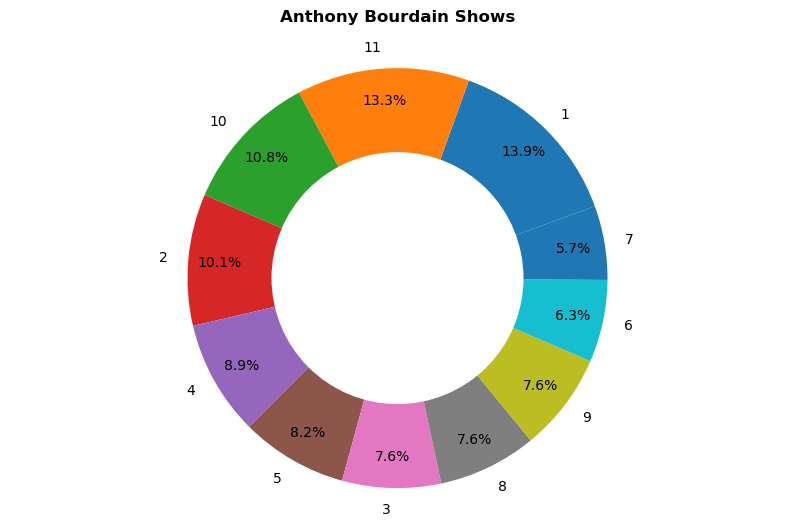

In [43]:
# What was Anthony Bourdain’s top show (longest running, and most episodes)?
plt.figure(figsize=(10,6))
plt.pie(season_count, labels=season_count.index,
        autopct="%1.1f%%", pctdistance=0.85, shadow=False, startangle=20)

# Draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title("Anthony Bourdain Shows\n", fontweight="bold")
plt.axis("equal")

plt.show()

In [15]:
# variable for the number of visits to each region
region_count = df.Region.value_counts()
region_count

North America      159
Asia                94
Europe              94
South America       42
Africa              32
Central America     32
Middle East         24
Oceania             14
Antarctica           4
Name: Region, dtype: int64

In [16]:
# Create a regional dataframe (regions per show, per season, per episode)
df_region = df.groupby(["Region", "Show", "Season", "Episode"])["Order"].count().reset_index()
df_region.columns = ["Region", "Show", "Season", "Episode", "Count"]
df_region = df_region.sort_values(["Region", "Show", "Season", "Episode"], ascending=True)
df_region.head(50)

Region             Show  Season  Episode  Count
0       Africa    A Cook's Tour       1       11      1
1       Africa    A Cook's Tour       1       12      1
2       Africa  No Reservations       3        2      6
3       Africa  No Reservations       3        4      4
4       Africa  No Reservations       6       16      2
5       Africa  No Reservations       8        1      3
6       Africa    Parts Unknown       1        5      1
7       Africa    Parts Unknown       1        6      4
8       Africa    Parts Unknown       1        8      2
9       Africa    Parts Unknown       2        7      1
10      Africa    Parts Unknown       4        6      3
11      Africa    Parts Unknown       5        5      1
12      Africa    Parts Unknown       6        6      1
13      Africa    Parts Unknown       7        7      1
14      Africa    Parts Unknown      10        3      1
15  Antarctica    Parts Unknown       9        6      4
16        Asia    A Cook's Tour       1        1      1
17        Asia    A Cook's Tour       1        2      1
18        Asia    A Cook's Tour       1        3      1
19        Asia    A Cook's Tour       1        4      1
20        Asia    A Cook's Tour       1        5      1
21        Asia    A Cook's Tour       1        6      3
22        Asia    A Cook's Tour       2       10      1
23        Asia    A Cook's Tour       2       11      1
24        Asia    A Cook's Tour       2       12      1
25        Asia    A Cook's Tour       2       13      2
26        Asia  No Reservations       1        4      3
27        Asia  No Reservations       1        5      1
28        Asia  No Reservations       1        8      2
29        Asia  No Reservations       2        1      5
30        Asia  No Reservations       2        7      1
31        Asia  No Reservations       2        9      3
32        Asia  No Reservations       2       10      2
33        Asia  No Reservations       2       11      1
34        Asia  No Reservations       2       12      2
35        Asia  No Reservations       3        7      4
36        Asia  No Reservations       3       12      1
37        Asia  No Reservations       4        1      1
38        Asia  No Reservations       4       11      1
39        Asia  No Reservations       4       16      1
40        Asia  No Reservations       5        7      3
41        Asia  No Reservations       5        9      1
42        Asia  No Reservations       5       10      2
43        Asia  No Reservations       5       16      2
44        Asia  No Reservations       6        8      1
45        Asia  No Reservations       6       10      2
46        Asia  No Reservations       6       17      1
47        Asia  No Reservations       7        2      4
48        Asia  No Reservations       7        8      1
49        Asia  No Reservations       7       10      1

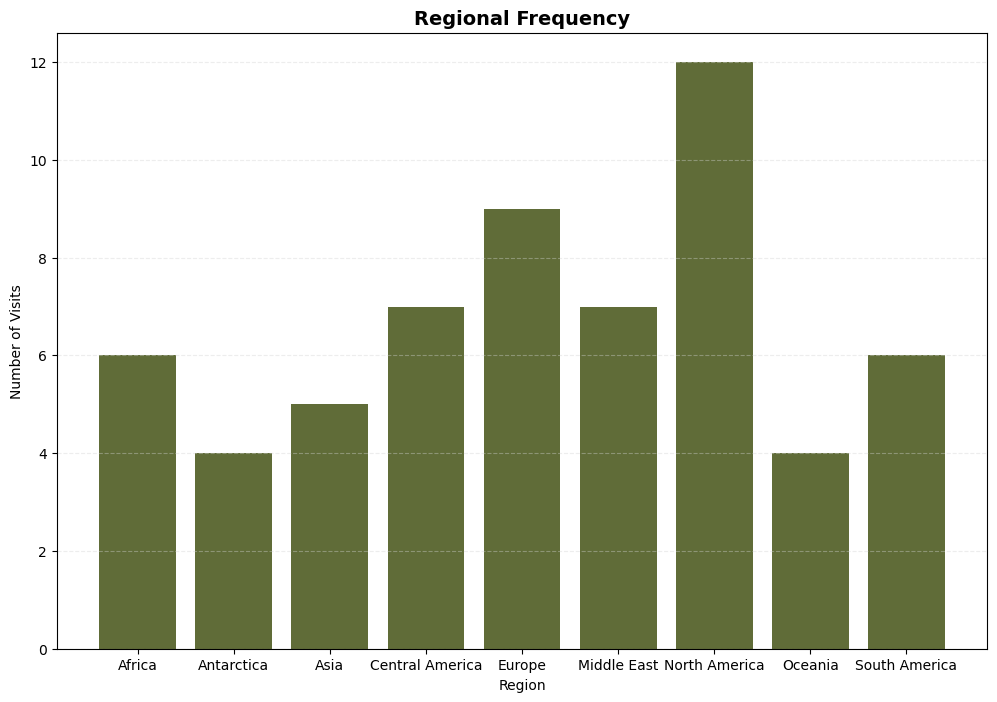

In [17]:
# Do we see any trends in general area or country frequency, and are those trends aligned across shows?

# Region
plt.figure(figsize=(12,8))
plt.bar(df_region.Region, df_region.Count, color="#606c38")

# customize
plt.title("Regional Frequency", fontsize=14, fontweight="bold")
plt.xlabel("Region")
plt.ylabel("Number of Visits")

# plt.ylim(0, 100)

plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.4)

# Finish the plot
plt.show()

In [18]:
# Create a variable for the count of each country
country_count = df.Country.value_counts()
country_count

United States    141
France            21
Italy             20
Japan             16
China             15
                ... 
Haiti              1
Sweden             1
Finland            1
Austria            1
Taiwan             1
Name: Country, Length: 86, dtype: int64

In [19]:
# Create a country dataframe (countries per show, per season, per episode)
df_country = df.groupby(["Country", "Show", "Season", "Episode"])["Order"].count().reset_index()
df_country.columns = ["Country", "Show", "Season", "Episode", "Count"]
df_country = df_country.sort_values(["Country", "Show", "Season", "Episode"], ascending=True)
df_country.head(50)

Country             Show  Season  Episode  Count
0                         Antarctica    Parts Unknown       9        6      4
1                          Argentina  No Reservations       3       13      1
2                          Argentina    Parts Unknown       8        8      1
3                            Armenia    Parts Unknown      11        4      1
4                          Australia    A Cook's Tour       2        8      1
5                          Australia    A Cook's Tour       2        9      1
6                          Australia  No Reservations       5       12      1
7                          Australia  No Reservations       9        2      1
8                            Austria  No Reservations       7        4      1
9                             Bhutan    Parts Unknown      11        8      3
10                            Brazil    A Cook's Tour       2        3      1
11                            Brazil    A Cook's Tour       2        4      1
12                            Brazil  No Reservations       3        9      1
13                            Brazil  No Reservations       7        6      1
14                            Brazil  No Reservations       9        7      1
15                            Brazil    Parts Unknown       3        9      1
16                            Brazil    Parts Unknown       8        9      2
17                            Brazil      The Layover       2        4      1
18                          Cambodia    A Cook's Tour       1        5      1
19                          Cambodia    A Cook's Tour       1        6      2
20                          Cambodia  No Reservations       7        2      4
21                            Canada  No Reservations       2        4      4
22                            Canada  No Reservations       4        3      1
23                            Canada    Parts Unknown       1        4      2
24                            Canada    Parts Unknown      11        3      2
25                            Canada      The Layover       1        6      1
26                            Canada      The Layover       2        5      1
27                             Chile  No Reservations       5       11      6
28                             China  No Reservations       2        1      3
29                             China  No Reservations       3        7      4
30                             China  No Reservations       3       12      1
31                             China  No Reservations       6        8      1
32                             China  No Reservations       7       10      1
33                             China    Parts Unknown       4        2      1
34                             China    Parts Unknown       8        4      2
35                             China    Parts Unknown      11        5      1
36                             China      The Layover       1        5      1
37                          Colombia  No Reservations       4       12      2
38                          Colombia    Parts Unknown       1        3      5
39                           Croatia  No Reservations       8        3      3
40                              Cuba  No Reservations       7        9      1
41                              Cuba    Parts Unknown       6        2      2
42                    Czech Republic  No Reservations       6        4      1
43  Democratic Republic of the Congo    Parts Unknown       1        8      2
44                           Denmark    Parts Unknown       2        5      1
45                Dominican Republic  No Reservations       9        9      3
46                           Ecuador  No Reservations       6        6      2
47                             Egypt  No Reservations       4       18      3
48                          Ethiopia    Parts Unknown       6        6      1
49                           Finland  No Reservations       8        6      1

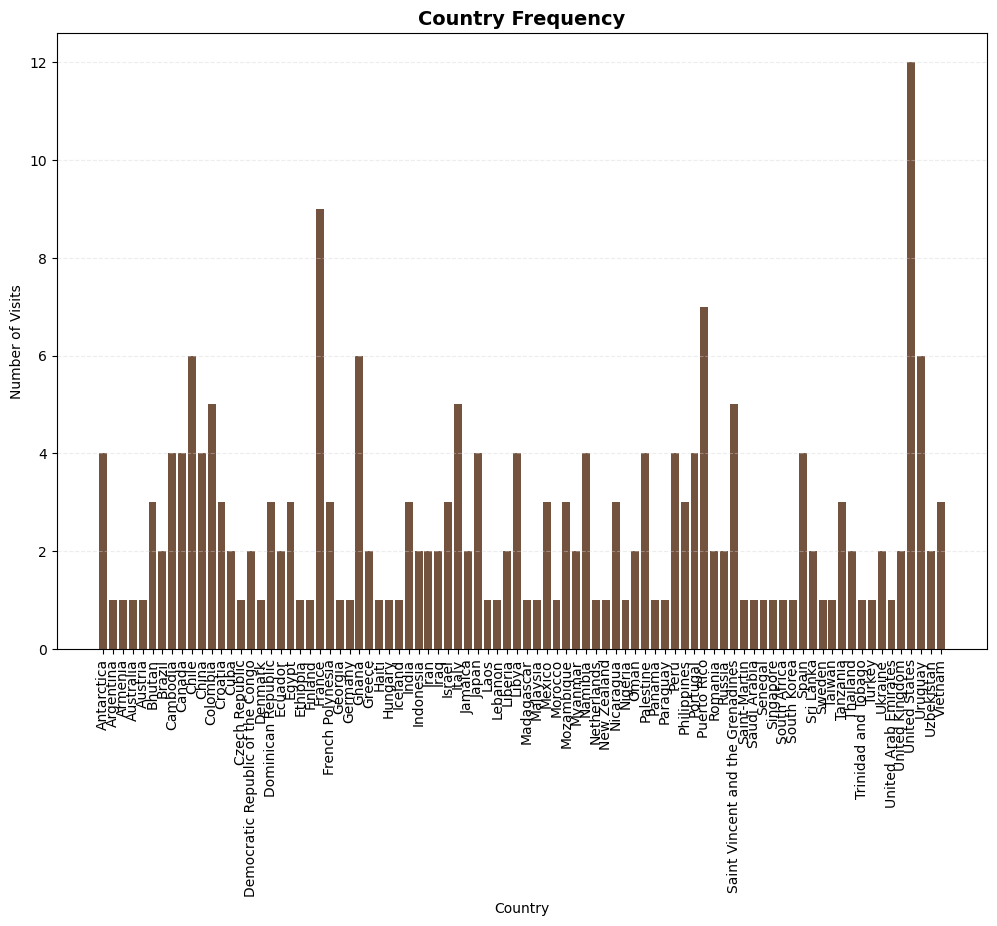

In [20]:
# Country
plt.figure(figsize=(12,8))
plt.bar(df_country.Country, df_country.Count, color="#73523e")

# customize
plt.title("Country Frequency", fontsize=14, fontweight="bold")
plt.xlabel("Country")
plt.ylabel("Number of Visits")
plt.xticks(rotation=90)

# plt.ylim(0, 100)

plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.4)

# Finish the plot
plt.show()

In [21]:
# Create a city dataframe (cities per show, per season, per episode)
df_city = df.groupby(["City", "Show", "Season", "Episode"])["Order"].count().reset_index()
df_city.columns = ["City", "Show", "Season", "Episode", "Count"]
df_city = df_city.sort_values(["City", "Show", "Season", "Episode"], ascending=True)
df_city.head(50)

City             Show  Season  Episode  Count
0                        Abiquiu  No Reservations       4       15      1
1                          Accra  No Reservations       3        2      1
2                     Adanwomase  No Reservations       3        2      1
3                    Addis Ababa    Parts Unknown       6        6      1
4                      Agrigento  No Reservations       1        6      1
5                           Aida    Parts Unknown       2        2      1
6                       Al Khums    Parts Unknown       1        6      1
7                   Alberquerque    Parts Unknown       2        4      1
8                       Amarante    A Cook's Tour       1       10      1
9                       Amarillo  No Reservations       4       15      1
10                      Amritsar    Parts Unknown       3        2      1
11                     Amsterdam      The Layover       1        7      1
12                  Antananarivo    Parts Unknown       5        5      1
13                      Arcachon    A Cook's Tour       1        9      1
14                    Argentière    Parts Unknown      10        2      1
15                   Asbury Park  No Reservations       1        3      1
16                   Asbury Park    Parts Unknown       5        6      1
17                       Ashanti  No Reservations       3        2      1
18                      Asunción    Parts Unknown       4        4      1
19                         Atami    A Cook's Tour       1        2      1
20                       Atlanta      The Layover       2        7      1
21                 Atlantic City  No Reservations       1        3      1
22                 Atlantic City    Parts Unknown       5        6      1
23                        Austin  No Reservations       6       15      1
24                        Austin  No Reservations       9        1      1
25                       Auxerre  No Reservations       9        5      1
26                        Azores  No Reservations       5        4      4
27                         Bagan    Parts Unknown       1        1      1
28                         Bahia    Parts Unknown       3        9      1
29                          Bali  No Reservations       2       12      1
30                     Baltimore  No Reservations       5       13      1
31                       Bangkok    A Cook's Tour       2       13      1
32                       Bangkok  No Reservations       5       16      1
33                     Barcelona  No Reservations       2       13      1
34                     Barcelona  No Reservations       4       17      1
35                Barnegat Light  No Reservations       1        3      1
36                Barnegat Light    Parts Unknown       5        6      1
37                Basque Country  No Reservations       4       17      1
38                    Battambang    A Cook's Tour       1        6      1
39                         Bayam  No Reservations       2        6      1
40                        Beaune  No Reservations       9        5      1
41                       Beijing  No Reservations       2        1      1
42                         Beira  No Reservations       8        1      1
43                        Beirut  No Reservations       2       14      1
44                        Beirut  No Reservations       6       21      1
45                        Beirut    Parts Unknown       5        9      1
46                       Belfast  No Reservations       3        1      1
47  Belo Horizonte, Minas Gerais    Parts Unknown       8        9      1
48                         Belém  No Reservations       7        6      1
49                        Bequai  No Reservations       6       14      1

In [23]:
# City
plt.figure(figsize=(12,8))
plt.bar(df_city.City, df_city.Count, color="#857e7b")

# customize
plt.title("City Frequency", fontsize=14, fontweight="bold")
plt.xlabel("City")
plt.ylabel("Number of Visits")
plt.xticks(rotation=90)

# plt.ylim(0, 100)

plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.4)

# Finish the plot
plt.show()

In [ ]:
# Is there a direct correlation between the number of episodes he did,
# and the number of places he visited? (Hypothesis: there is a direct positive correlation.)

# Plot the number of sightings per decade for each region as a line chart
# define a variable for each region
# west_timeline = decade_region_df[decade_region_df["region"] == "West"]
# southwest_timeline = decade_region_df[decade_region_df["region"] == "Southwest"]
# midwest_timeline = decade_region_df[decade_region_df["region"] == "Middle West"]
# southeast_timeline = decade_region_df[decade_region_df["region"] == "Southeast"]
# northeast_timeline = decade_region_df[decade_region_df["region"] == "Northeast"]

# # configure the chart
# plt.figure(figsize=(12,6))

# plt.plot(west_timeline.decades, west_timeline.year, color="midnightblue", label="West")
# plt.plot(southwest_timeline.decades, southwest_timeline.year, color="teal", label="Southwest")
# plt.plot(midwest_timeline.decades, midwest_timeline.year, color="dimgrey", label="Middle West")
# plt.plot(southeast_timeline.decades, southeast_timeline.year, color="limegreen", label="Southeast")
# plt.plot(northeast_timeline.decades, northeast_timeline.year, color="yellow", label="Northeast")

# plt.grid(axis="y", c="gray", linestyle="dashed", alpha=0.4)
# plt.legend(loc="best")

# # save the donut chart
# plt.savefig("sightings_over_time_per_region.png")

# # Show the chart
# plt.show()

In [26]:
# Configure the map
map_plot_1 = df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "Count",
    color = "City"
)

# Display the map plot
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (City)

In [33]:
# checking out ydata-profiling!
todays_date = '20230725'
profile = ProfileReport(df, title = " {} Profiling Report".format (todays_date))
df_profile = profile.to_notebook_iframe()
profile.to_file("df_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]